In [1]:
#!usr/bin/python
import numpy as np
import HFStability
import matplotlib.pyplot as plt

#Each run is an instance of PyHEG
run = HFStability.PyHEG(rs=3.0, ndim=2, Nk=10)

## Reproducing figures 2.1 and 2.2 from pages 82, 83 of Guiliani & Vignale, Quantum Theory of the Electron Liquid (2005)


In [13]:
def two_electron_2d(k1, k3):
    const = 2.0 * np.pi / run.vol 
    q = np.linalg.norm(k3 - k1)
    if q < 10e-10:
        return 0.0
    return const / (q**(run.ndim-1))

def kin(i):
    return 0.5 * np.linalg.norm(run.states[i]) ** 2

def exch(i):
    exch = 0.0
    for j in run.occ_states:
        #NOTE THERE SHOULD BE A 2 INSTEAD OF 1.0 . IS THIS BECAUSE IM
        #OFF BY A FACTOR OF 2 IN TWO_ELECTRON_2d???
        #I believe this is resolved, and should be a 1. Having a 2 here would
        #double count the exchange, ie include exchange interaction between 
        #electrons of opposite spin. 
        exch += 1.0 * two_electron_2d(run.states[i], run.states[j])
    exch = exch * (-1.)
    return exch

def energy(i):
    return kin(i) + exch(i)
    
    

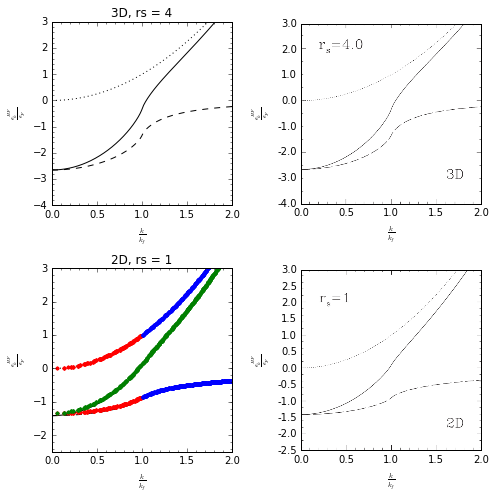

In [14]:
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.ticker import AutoMinorLocator
fig, axes = plt.subplots(2,2,figsize=(7,7))

#3D plot
run.ndim = 3
run.rs = 4.0
#run.fermi_energy = 0.5 * run.kf**2
x = np.linspace(0, 2.0 * run.kf, 500)
energy_x = np.array([run.analytic_energy(i) for i in x]) / run.fermi_energy
kinetic_x = np.array([0.5 * i**2 for i in x]) / run.fermi_energy
exch_x = np.array([run.analytic_exch(i) for i in x]) / run.fermi_energy
x = x / run.kf  #rescale for plot
axes[0,0].plot(x, energy_x, 'k-' , label='total energy')
axes[0,0].plot(x, kinetic_x, 'k:', label='kinetic energy')
axes[0,0].plot(x, exch_x, 'k--', label='exchange energy')
axes[0,0].set_title('3D, rs = 4')
axes[0,0].set_xlabel(r'$\frac{k}{k_f}$')
axes[0,0].set_ylabel(r'$\frac{\epsilon_k^{HF}}{\epsilon_F}$')
axes[0,0].set_xlim(0,2)
axes[0,0].set_ylim(-4.0,3.0)

#add minor ticks
minor_locator = AutoMinorLocator(5)
axes[0,0].yaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
minor_locator = AutoMinorLocator(5)
axes[0,0].xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')

#2D plot
run.ndim = 2
run.rs = 1.0
#run.fermi_energy = 0.5 * run.kf**2
x = np.linspace(0, 2.0 * run.kf, 500)
energy_x = np.array([run.analytic_energy(i) for i in x]) / run.fermi_energy
kinetic_x = np.array([0.5 * i**2 for i in x]) / run.fermi_energy
exch_x = np.array([run.analytic_exch(i) for i in x]) / run.fermi_energy
x = x / run.kf  #rescale for plot

axes[1,0].plot(x, energy_x, 'k-' , label='total energy')
axes[1,0].plot(x, kinetic_x, 'k:', label='kinetic energy')
axes[1,0].plot(x, exch_x, 'k--', label='exchange energy')
axes[1,0].set_title('2D, rs = 1')
axes[1,0].set_xlabel(r'$\frac{k}{k_f}$')
axes[1,0].set_ylabel(r'$\frac{\epsilon_k^{HF}}{\epsilon_F}$')
axes[1,0].set_xlim(0,2)
axes[1,0].set_ylim(-2.5,3)

#Discretized 2D 
run.Nk = 50
xo = [np.linalg.norm(run.states[i]) / run.kf for i in run.occ_states]
xv = [np.linalg.norm(run.states[i]) / run.kf for i in run.vir_states]
yo = [kin(i) / run.fermi_energy for i in run.occ_states] 
yv = [kin(i) / run.fermi_energy for i in run.vir_states] 
yeo = [exch(i) / run.fermi_energy for i in run.occ_states] 
yev = [exch(i) / run.fermi_energy for i in run.vir_states] 
yto = [yo[i]+yeo[i] for i, k in enumerate(yo)]
ytv = [yv[i]+yev[i] for i, k in enumerate(yv)]
axes[1,0].plot(xo, yo, 'r.')
axes[1,0].plot(xv, yv, 'b.')
axes[1,0].plot(xo, yeo, 'r.')
axes[1,0].plot(xv, yev, 'b.')
axes[1,0].plot(xo, yto, 'g.')
axes[1,0].plot(xv, ytv, 'g.')

#add minor ticks
minor_locator = AutoMinorLocator(5)
axes[1,0].yaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
minor_locator = AutoMinorLocator(5)
axes[1,0].xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')

#3D Figure
image = mpimg.imread("HF_singleparticleenergy_3D_Guiliani2005_fig2.1_cropped.png")
ntix = 5
xlabels = np.linspace(0,2,ntix)
xtix = np.linspace(0, image.shape[0], ntix)
ntix = 8
ytix = np.linspace(0, image.shape[1], ntix)
ylabels = np.linspace(-4,3,ntix)
axes[0,1].axis('on')
axes[0,1].imshow(image[::-1,:,:])
axes[0,1].set_xticks(xtix,minor=False)
axes[0,1].set_xticklabels(xlabels)
axes[0,1].set_xlim(0,image.shape[0])
axes[0,1].set_yticks(ytix)
axes[0,1].set_yticklabels(ylabels)
axes[0,1].set_ylim(0,image.shape[1])
axes[0,1].tick_params(top='off', bottom='off', left='off', right='off')
axes[0,1].set_xlabel(r'$\frac{k}{k_f}$')
axes[0,1].set_ylabel(r'$\frac{\epsilon_k^{HF}}{\epsilon_F}$')


#2D Figure
image = mpimg.imread("HF_singleparticleenergy_2D_Guiliani2005_fig2.2_cropped.png")
ntix = 5
xlabels = np.linspace(0,2,ntix)
xtix = np.linspace(0, image.shape[0], ntix)
ntix = 12
ytix = np.linspace(0, image.shape[1], ntix)
ylabels = np.linspace(-2.5,3,ntix)
axes[1,1].axis('on')
axes[1,1].imshow(image[::-1,:,:])
axes[1,1].set_xticks(xtix,minor=False)
axes[1,1].set_xticklabels(xlabels)
axes[1,1].set_xlim(0,image.shape[0])
axes[1,1].set_yticks(ytix)
axes[1,1].set_yticklabels(ylabels)
axes[1,1].set_ylim(0,image.shape[1])
axes[1,1].tick_params(top='off', bottom='off', left='off', right='off')
axes[1,1].set_xlabel(r'$\frac{k}{k_f}$')
axes[1,1].set_ylabel(r'$\frac{\epsilon_k^{HF}}{\epsilon_F}$')

plt.tight_layout()
plt.show()